In [76]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
# read the data
data = pd.read_csv('../data/df_clean.csv')

In [78]:
data = data.loc[data['NationalLeagueLevel'] == '1.Liga']  # to filter the data we only include data with national league level = 1.Liga to make sure we have all necessary datapoints

In [79]:
data = data.loc[data['Value'] < 20e6]  # for better visualization, exclude very low values

In [80]:
data = data.loc[data['Value'] > 1000000]  # for better visualization, exclude very low values

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 0 to 17635
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LeagueCountry             3245 non-null   object 
 1   League                    3245 non-null   object 
 2   NationalLeagueLevel       3245 non-null   object 
 3   Club                      3245 non-null   object 
 4   No                        3232 non-null   float64
 5   Name                      3245 non-null   object 
 6   Value                     3245 non-null   float64
 7   HighestValue              3245 non-null   float64
 8   Age                       3245 non-null   float64
 9   Height                    3239 non-null   float64
 10  Nationality               3245 non-null   object 
 11  Foot                      3217 non-null   object 
 12  Position                  3245 non-null   object 
 13  Consultancy               2966 non-null   object 
 14  Supplie

In [82]:
df_float = data.select_dtypes(include='float')

In [1]:
# display a jointplot for every feature with the target variable 'value' to get to know the correlation patterns as well as the distributions of the individual features
for col in df_float.columns:
    sns.jointplot(data=df_float, x='Value', y=col, kind="reg")
    plt.show()

NameError: name 'df_float' is not defined

In [85]:
df = data.copy()

In [86]:
Consultancies = df["Consultancy"].value_counts().nlargest(15).index  # filter the consultancies which have contracts with more than 15 players, for better clarity

In [87]:
filtered_df = df[df["Consultancy"].isin(Consultancies)]

<AxesSubplot:xlabel='Value', ylabel='Consultancy'>

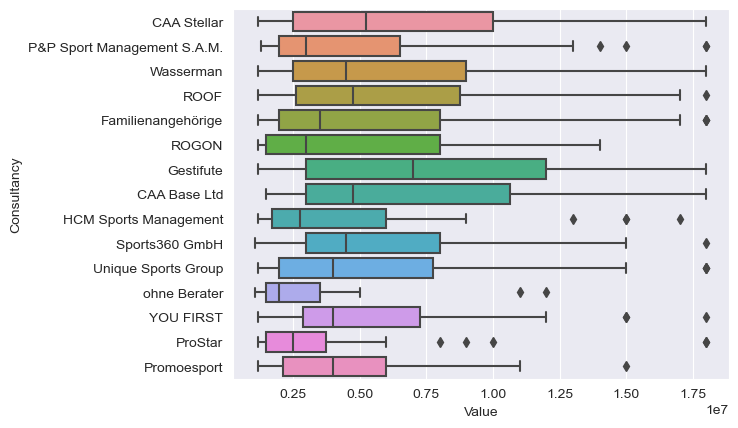

In [88]:
sns.boxplot(x=filtered_df["Value"], y=filtered_df["Consultancy"])

<AxesSubplot:xlabel='Value', ylabel='Foot'>

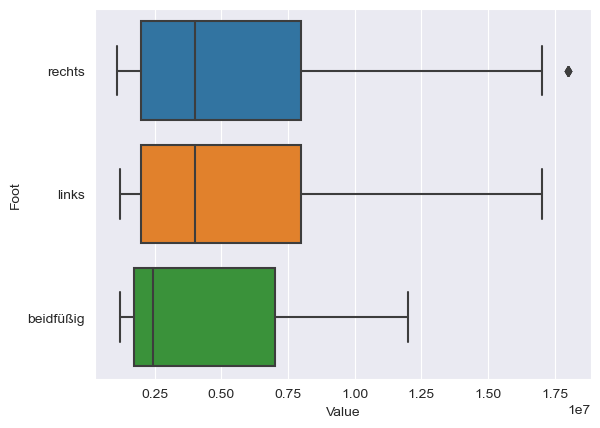

In [98]:
sns.boxplot(x=df["Value"], y=df["Foot"])

<AxesSubplot:xlabel='Value', ylabel='PositionCategory'>

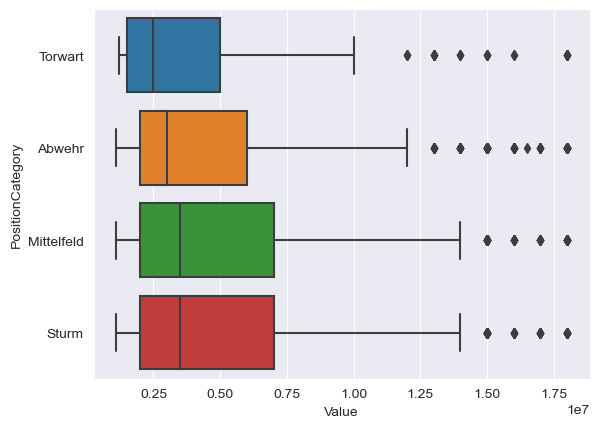

In [99]:
sns.boxplot(x=df["Value"], y=df["PositionCategory"])

In [100]:
Nationality = df["Nationality"].value_counts().nlargest(20).index

In [102]:
filtered_df_2 = df[df["Nationality"].isin(Nationality)]

<AxesSubplot:xlabel='Value', ylabel='Nationality'>

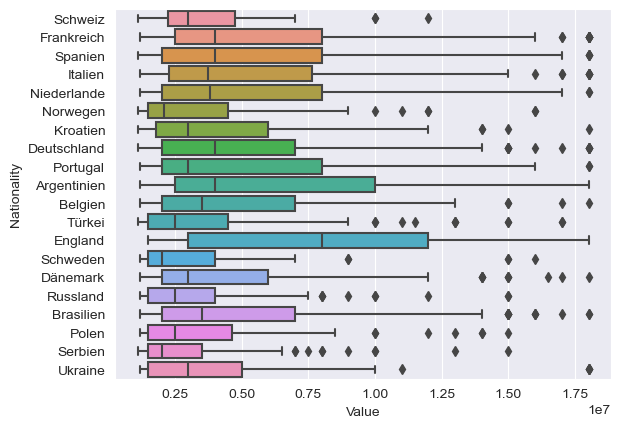

In [103]:
sns.boxplot(x=filtered_df_2["Value"], y=filtered_df_2["Nationality"])

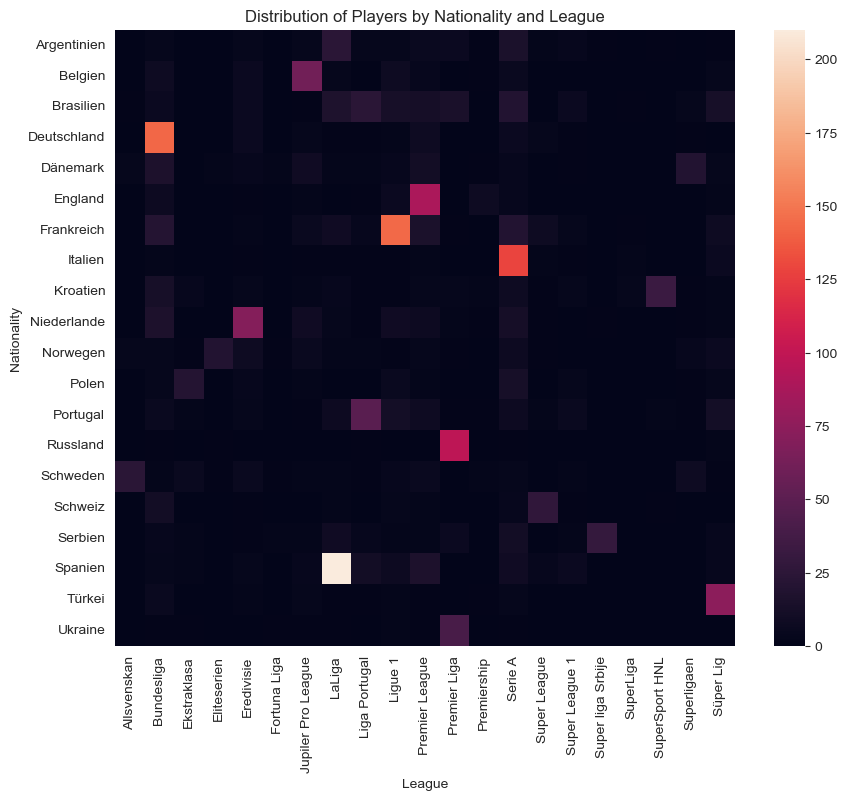

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

Nationality = df["Nationality"].value_counts().nlargest(20).index  # filter the consultancies which have contracts with more than 20 players, for better clarity
df = df[df['Nationality'].isin(Nationality)]
# Create a pivot table with counts for each combination of 'Nationality' and 'League'
pivot_table = pd.pivot_table(df, index='Nationality', columns='League', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table)
plt.title('Distribution of Players by Nationality and League')
plt.show()

In [95]:
Supplier = df["Supplier"].value_counts().nlargest(5).index  # filter the consultancies which have contracts with more than 5 players, for better clarity

In [96]:
filtered_df_3 = df[df["Supplier"].isin(Supplier)]

<AxesSubplot:xlabel='Value', ylabel='Supplier'>

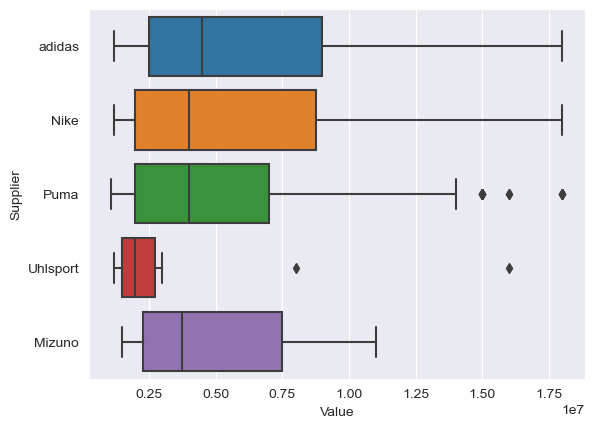

In [97]:
sns.boxplot(x=filtered_df_3["Value"], y=filtered_df_3["Supplier"])